## Breast Cancer detection logistic model

## Load Breast Cancer Dataset (Real Medical Data)

We use the built-in **Breast Cancer Wisconsin dataset** from scikit-learn.

- **569 patients**
- **30 tumor measurement features**
- Target labels:
  - `0` = Malignant (Cancer)
  - `1` = Benign (Healthy)

This project builds a **Logistic Regression baseline** for cancer classification.

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# NEW TOOLS FOR CLASSIFICATION
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()


## Define Features (X) and Target (y)

We separate the dataset into:

- **X** → the 30 medical input features (tumor measurements)
- **y** → the target label (cancer vs non-cancer)

This is the standard ML format:

Inputs → Model → Prediction

In [16]:
# ==============================
# 1. LOAD REAL DATASET
# ==============================

cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")

print("Dataset shape (patients, features):", X.shape)
print("Target names:", cancer.target_names)

Dataset shape (patients, features): (569, 30)
Target names: ['malignant' 'benign']


## Check Class Distribution (Imbalance)

Before training, we check how many patients are:

- Malignant (Cancer)
- Benign (Healthy)

Medical datasets are often imbalanced, so this step ensures the model does not become biase


Class distribution:
target
1    357
0    212
Name: count, dtype: int64


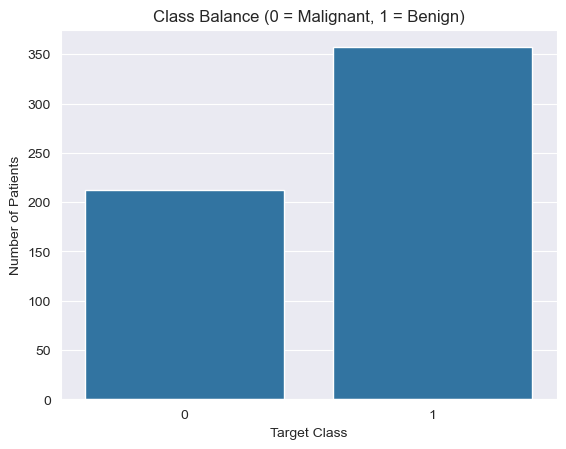

In [17]:
# ==============================
# 2. CLASS BALANCE CHECK (GRAPH)
# ==============================

print("\nClass distribution:")
print(y.value_counts())

plt.figure()
sns.countplot(x=y)
plt.title("Class Balance (0 = Malignant, 1 = Benign)")
plt.xlabel("Target Class")
plt.ylabel("Number of Patients")
plt.show()

## Feature Correlation (Top Predictive Symptoms)

We compute correlation between each feature and the cancer target to identify the most informative tumor measurements.

This helps us understand:

- Which symptoms are strongly linked to malignancy
- Which features may contribute most to prediction

We visualize the top correlated features using a heatmap.

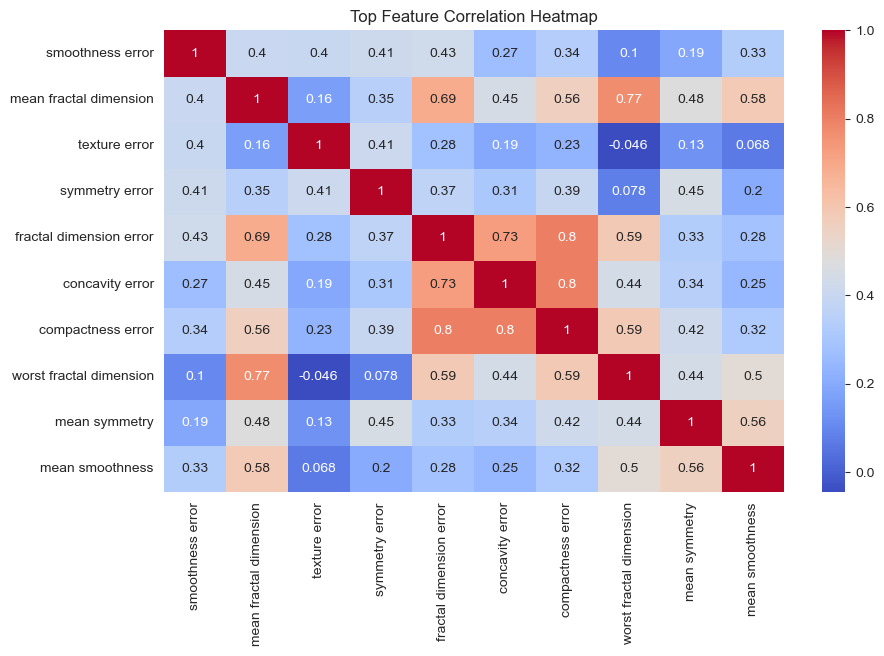

In [18]:
# ==============================
# 3. FEATURE CORRELATION (TOP 10)
# ==============================

df = X.copy()
df["target"] = y

corr = df.corr()["target"].sort_values(ascending=False)

top_features = corr.index[1:11]

plt.figure(figsize=(10,6))
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Feature Correlation Heatmap")
plt.show()

## Train–Test Split (Unseen Patient Evaluation)

We split the dataset into:

- **Training set (80%)** → used to learn patterns
- **Test set (20%)** → unseen data used for final evaluation

`stratify=y` ensures both sets keep the same cancer vs benign proportion, preventing biased splits.

In [19]:
# ==============================
# 4. TRAIN–TEST SPLIT
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Feature Scaling (Mandatory for Logistic Regression)

Tumor features have very different numeric ranges (radius, area, texture).

We apply **StandardScaler** to:

- Center features around 0
- Scale them to similar variance

Scaling is critical for gradient-based models like Logistic Regression and Neural Networks.

In [20]:
# ==============================
# 5. FEATURE SCALING
# ==============================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nMean of scaled training features:", X_train_scaled.mean())
print("Std of scaled training features:", X_train_scaled.std())




Mean of scaled training features: -1.2493059090287476e-16
Std of scaled training features: 1.0


## Train Logistic Regression (Baseline Classifier)

We train a **Logistic Regression** model as the baseline for cancer detection.

- `max_iter=1000` ensures the optimizer converges
- `class_weight="balanced"` penalizes cancer mistakes more fairly due to class imbalance

This baseline will later be compared against a Neural Network.

In [21]:
# ==============================
# 6. LOGISTIC REGRESSION MODEL
# ==============================

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

## Model Prediction & Probability Estimation

After training the Logistic Regression model, we evaluate it on **unseen test data**.

Two types of outputs are generated:

- **Class predictions (`y_pred`)**
  - Final decision: Cancer or Benign
  - Uses the default probability threshold of **0.5**
  - This is what a basic classifier returns

- **Predicted probabilities (`y_prob`)**
  - Continuous values between **0 and 1**
  - Represent the model’s confidence for the positive class
  - Essential for:
    - ROC Curve
    - Precision–Recall Curve
    - Threshold tuning to reduce false negatives

Logistic Regression is fundamentally a **probability model**, not just a hard classifier.
Using probabilities allows us to make **risk-aware decisions**, which is critical in medical diagnosis.

In [22]:

# ==============================
# 7. PREDICTION
# ==============================

y_pred = log_reg.predict(X_test_scaled)

# Probabilities (for ROC + Thresholding)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]


## Model Evaluation (Accuracy, Confusion Matrix, Classification Report)

After making predictions on the unseen test set, we evaluate the model using
classification-specific metrics.

This step is critical because medical diagnosis is not only about overall accuracy,
but about understanding the types of errors the model makes.

### Metrics Used

- **Accuracy**
  - Measures the overall percentage of correct predictions.
  - Useful as a general summary, but not sufficient alone in healthcare.

- **Confusion Matrix**
  - Breaks predictions into four outcomes:
    - True Positives (correct cancer detection)
    - True Negatives (correct healthy detection)
    - False Positives (false alarm)
    - False Negatives (missed cancer case)
  - False Negatives are the most dangerous error in medical applications.

- **Classification Report**
  - Provides class-wise performance:
    - **Precision** → how reliable positive predictions are
    - **Recall** → how many real cancer cases were caught
    - **F1-score** → balance between precision and recall
  - Recall is especially important in cancer detection, where missing a sick patient is high risk.

This evaluation establishes a strong Logistic Regression baseline before moving to Neural Networks.

In [23]:
# ==============================
# 8. EVALUATION OUTPUTS
# ==============================

print("\n--- Accuracy ---")
print(accuracy_score(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Accuracy ---
0.956140350877193

--- Confusion Matrix ---
[[41  1]
 [ 4 68]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Confusion Matrix Heatmap (Error Analysis)

To better interpret the model’s predictions, we visualize the confusion matrix
as a heatmap.

This plot provides an immediate view of how many patients were:

- Correctly classified as cancer (True Positives)
- Correctly classified as healthy (True Negatives)
- Incorrectly flagged as cancer (False Positives)
- Missed cancer cases (False Negatives)

In medical diagnosis, the most critical value is the number of **False Negatives**,
because predicting “healthy” for a cancer patient is the highest-risk mistake.

The heatmap makes these error patterns easier to understand than raw numbers.

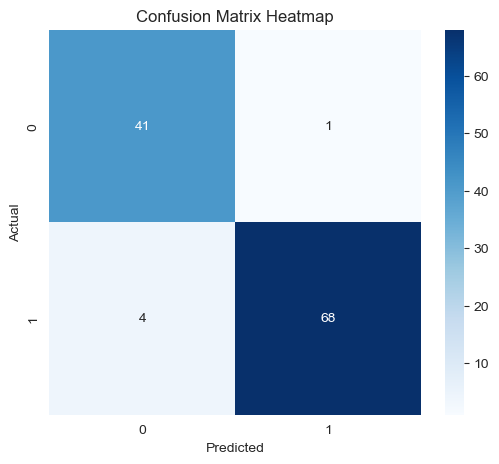

In [24]:
# ==============================
# 9. CONFUSION MATRIX HEATMAP (GRAPH)
# ==============================

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Precision–Recall Curve (High-Stakes Medical Evaluation)

In medical classification problems, accuracy alone is not enough.
We need to understand how well the model detects cancer cases while controlling false alarms.

The **Precision–Recall Curve** is especially important when:

- The dataset is imbalanced
- False negatives are dangerous
- The positive class (cancer) must not be missed

### What this curve shows

- **Recall (x-axis)**
  Measures how many real cancer patients the model successfully detects.

- **Precision (y-axis)**
  Measures how reliable the model’s cancer predictions are.


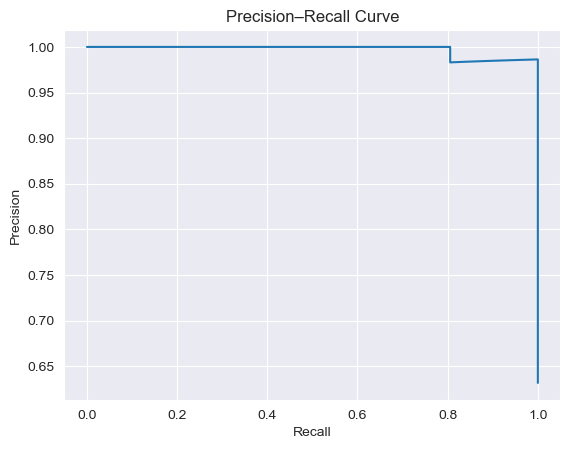

In [25]:
# ==============================
# 10. ROC CURVE + AUC (GRAPH)
# ==============================

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


## Threshold Experiment (Risk Control)

Logistic Regression outputs probabilities, which are converted into class labels using a decision threshold.

By lowering the threshold (e.g., from 0.5 to 0.3), we make the model more sensitive to cancer cases.

This can reduce **false negatives**, which is critical in medical diagnosis.


In [28]:
# ==============================
# 11. THRESHOLD EXPERIMENT
# ==============================

threshold = 0.3
y_pred_low = (y_prob >= threshold).astype(int)

print(f"\nConfusion Matrix (threshold = {threshold})")
print(confusion_matrix(y_test, y_pred_low))


Confusion Matrix (threshold = 0.3)
[[41  1]
 [ 0 72]]
